In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
columns = ['age','sex', 'cp' ,'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
df1 = pd.read_csv("Cleavland.csv",names = columns)

In [5]:
df2 = pd.read_csv("hung.csv",names=columns)

In [6]:
df3 = pd.read_csv("Switzerland.csv",names=columns)

In [7]:
df=pd.concat([df1,df2,df3])

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
118,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
119,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
120,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
121,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1
122,74.0,1.0,2.0,145,0,?,1,123,0,1.3,1,?,?,1


In [11]:
df.replace('?',pd.NA,inplace=True)

In [12]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  717 non-null    object 
 4   chol      697 non-null    object 
 5   fbs       637 non-null    object 
 6   restecg   718 non-null    object 
 7   thalach   718 non-null    object 
 8   exang     718 non-null    object 
 9   oldpeak   714 non-null    object 
 10  slope     513 non-null    object 
 11  ca        307 non-null    object 
 12  thal      400 non-null    object 
 13  num       720 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 84.4+ KB


In [14]:
df['trestbps']= df['trestbps'].fillna(df['trestbps'].mode()[0])
df['chol']=df['chol'].fillna(df['chol'].mode()[0])
df['fbs']=df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg']=df['restecg'].fillna(df['restecg'].mode()[0])
df['thalach']=df['thalach'].fillna(df['thalach'].mode()[0])
df['exang']=df['exang'].fillna(df['exang'].mode()[0])
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mode()[0])
df['slope']=df['slope'].fillna(df['slope'].mode()[0])
df['ca']=df['ca'].fillna(df['ca'].mode()[0])
df['thal']=df['thal'].fillna(df['thal'].mode()[0])

In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [16]:
import seaborn as sns

<Axes: xlabel='age', ylabel='Density'>

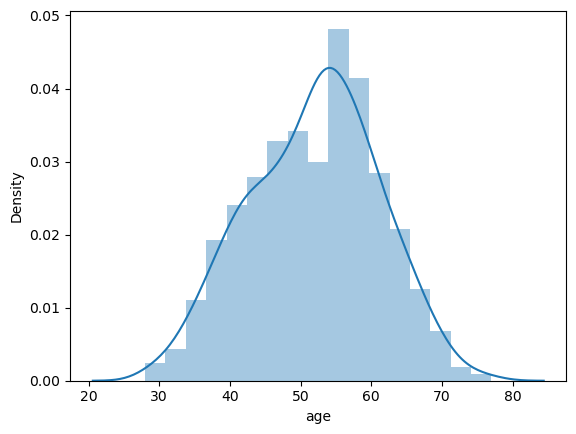

In [17]:
sns.distplot(df['age'])

<Axes: >

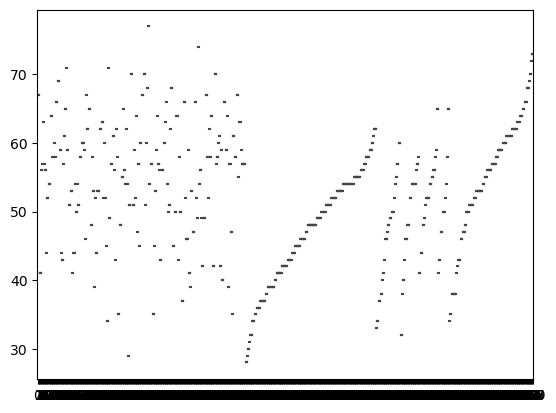

In [18]:
sns.boxplot(df['age'])

In [19]:
upper_limit = df['age'].mean() +3*df['age'].std()
lower_limit = df['age'].mean() -3*df['age'].std()
print('Upper Limit is:', upper_limit)
print('Lower Limit is:',lower_limit)

Upper Limit is: 79.47004994245198
Lower Limit is: 24.307727835325796


In [20]:
outliers = df.loc[(df['age']>upper_limit)| (df['age']<lower_limit)]

In [21]:
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


<Axes: xlabel='chol', ylabel='Density'>

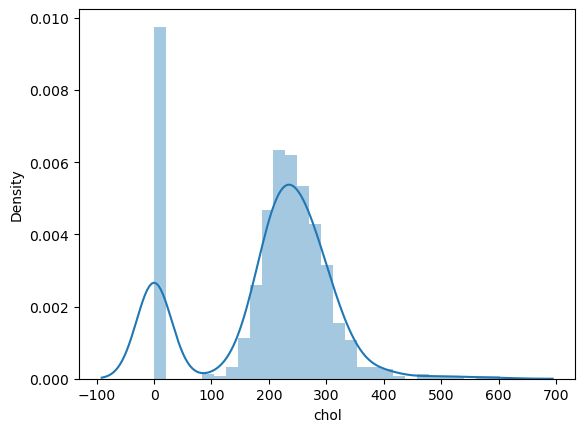

In [22]:
sns.distplot(df['chol'])

In [23]:
df['chol']=pd.to_numeric(df['chol'],downcast = 'integer')

In [24]:
upper_limit2 = df['chol'].mean() +3*df['chol'].std()
lower_limit2 = df['chol'].mean() -3*df['chol'].std()
print('Upper Limit is:', upper_limit2)
print('Lower Limit is:',lower_limit2)

Upper Limit is: 538.4075241698306
Lower Limit is: -141.94085750316398


In [25]:
outliers=df.loc[(df['chol']>upper_limit2) |(df['chol']<lower_limit2)]

In [26]:
outliers.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
152,67.0,0.0,3.0,115.0,564,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
243,54.0,1.0,4.0,130,603,1,0,125,1,1.0,2,0.0,3.0,1


In [27]:
newdf = df.loc[(df['chol']<upper_limit2) & (df['chol']>lower_limit2)]

In [28]:
len(newdf)

718

In [29]:
len(df)

720

In [30]:
print('Number of outliers are:',len(df)-len(newdf))

Number of outliers are: 2


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  720 non-null    float64
 4   chol      720 non-null    int16  
 5   fbs       720 non-null    object 
 6   restecg   720 non-null    object 
 7   thalach   720 non-null    object 
 8   exang     720 non-null    object 
 9   oldpeak   720 non-null    object 
 10  slope     720 non-null    object 
 11  ca        720 non-null    object 
 12  thal      720 non-null    object 
 13  num       720 non-null    int64  
dtypes: float64(4), int16(1), int64(1), object(8)
memory usage: 96.3+ KB


In [44]:
df['chol']=df['chol'].astype(float)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  720 non-null    float64
 4   chol      720 non-null    float64
 5   fbs       720 non-null    object 
 6   restecg   720 non-null    object 
 7   thalach   720 non-null    object 
 8   exang     720 non-null    object 
 9   oldpeak   720 non-null    object 
 10  slope     720 non-null    object 
 11  ca        720 non-null    object 
 12  thal      720 non-null    object 
 13  num       720 non-null    int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 100.5+ KB


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [68]:
y = 'cp'
X = ['age','sex','chol']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(df[X],df[y],test_size=0.3,random_state=46)

In [70]:
clf = GaussianNB()

In [71]:
clf.fit(X_train,y_train)

GaussianNB()

In [72]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
print(accuracy_score(y_pred,y_test))

0.49537037037037035


In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression()

In [77]:
lr.fit(X_train,y_train)

LogisticRegression()

In [78]:
lr_pred = lr.predict(X_test)

In [79]:
print(accuracy_score(lr_pred,y_test))

0.5185185185185185


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [82]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [83]:
classifier_pred = classifier.predict(X_test)

In [84]:
print(accuracy_score(classifier_pred,y_test))

0.4722222222222222
